In [329]:
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
from skimage.transform import resize
import math
from skimage.feature import hog
import numpy as np
     


import os
import cv2

def read_images_in_folder(folder_path):
    images = os.listdir(folder_path) 
        
    return images

# Example usage
folder_path = 'images'
forest_folder_path = 'images-water'
images = read_images_in_folder(folder_path)
images_forest = read_images_in_folder(forest_folder_path)
print(len(images_forest),len(images))
# print((folder_path+'/'+images[]))
# plt.imshow(resize(color.rgb2gray(io.imread(folder_path+'/'+images[302])), (128, 128)))


926 2631


In [330]:
img=[]
img_forest = []
for i in range(len(images)):
    img.append(resize(color.rgb2gray(io.imread(folder_path+'/'+images[i])), (128, 128)))
for j in range(len(images_forest)):
    img_forest.append(resize(color.rgb2gray(io.imread(forest_folder_path+'/'+images_forest[j])), (128, 128)))

In [331]:

img = np.array(img)
img_forest = np.array(img_forest)

img.shape

(2631, 128, 128)

In [332]:
def mag_and_angle_cal(mag,theta,imgs):
  # magnitudeArray = np.zeros(((len(imgs),128,128)))
  # angleArray = np.zeros(((len(imgs),128,128)))
  for idx in range(imgs.shape[0]):
    for i in range(128):
      for j in range(128):
          # Condition for axis 0
        if j-1 <= 0 or j+1 >= 128:
          if j-1 <= 0:
            # Condition if first element
            Gx = imgs[idx][i][j+1] - 0
          elif j + 1 >= len(imgs[idx][0]):
            Gx = 0 - imgs[idx][i][j-1]
        # Condition for first element
        else:
          Gx = imgs[idx][i][j+1] - imgs[idx][i][j-1]
    
       # Condition for axis 1
        if i-1 <= 0 or i+1 >= 128:
          if i-1 <= 0:
            Gy = 0 - imgs[idx][i+1][j]
          elif i +1 >= 128:
            Gy =imgs[idx][i-1][j] - 0
        else:
          Gy = imgs[idx][i-1][j] - imgs[idx][i+1][j]

        # Calculating magnitude
        magnitude = math.sqrt(pow(Gx, 2) + pow(Gy, 2))
        mag[idx][i][j] += round(magnitude, 9)

        # Calculating angle
        if Gx == 0:
          angle = math.degrees(0.0)
        else:
          angle = math.degrees(abs(math.atan(Gy / Gx)))
        theta[idx][i][j] += round(angle, 9)

  return mag,theta
      # mag = np.array(mag)
      # theta = np.array(theta)

In [333]:
mag = np.zeros(((len(images),128,128)))
theta = np.zeros(((len(images),128,128)))

mag_forest = np.zeros(((len(images_forest),128,128)))
theta_forest = np.zeros(((len(images_forest),128,128)))
mag_f,theta_f = mag_and_angle_cal(mag,theta,img)
mag_forest_f,theta_forest_f = mag_and_angle_cal(mag_forest,theta_forest,img_forest)

# mag_f.shape


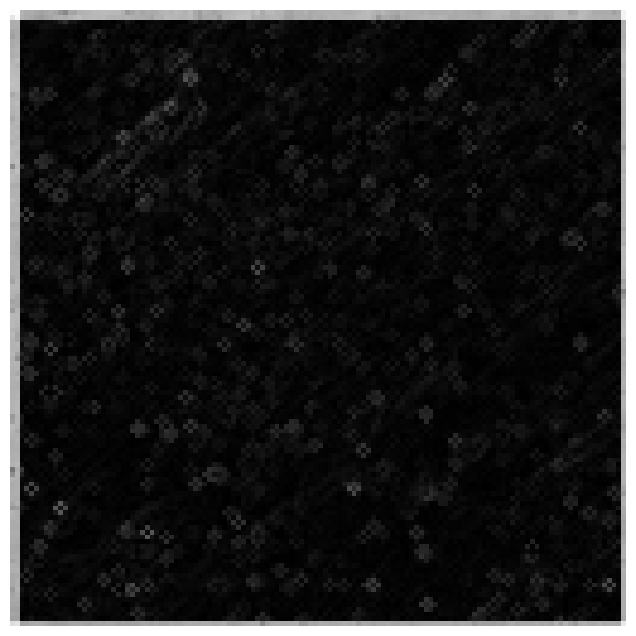

In [334]:
plt.figure(figsize=(15, 8))
plt.imshow(mag_f[1], cmap="gray")
plt.axis("off")
plt.show()

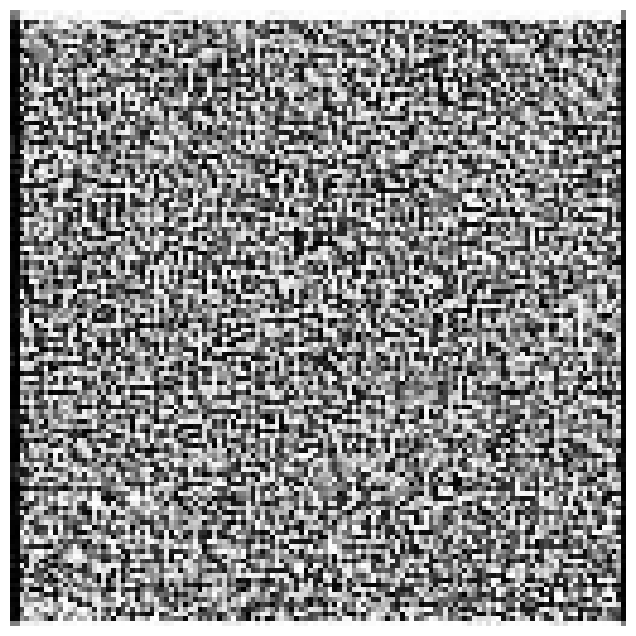

In [335]:
plt.figure(figsize=(15, 8))
plt.imshow(theta[1], cmap="gray")
plt.axis("off")
plt.show()

In [336]:
number_of_bins = 9
step_size = 180 / number_of_bins
     

In [337]:
def calculate_j(angle):
  temp = (angle / step_size) - 0.5
  j = math.floor(temp)
  return j

In [338]:

def calculate_Cj(j):
  Cj = step_size * (j + 0.5)
  return round(Cj, 9)

In [339]:
def calculate_value_j(magnitude, angle, j):
  Cj = calculate_Cj(j+1)
  Vj = magnitude * ((Cj - angle) / step_size)
  return round(Vj, 9)

In [340]:
# def histogram(mag,theta):
#   hist_set = {}
#   for idx in range(mag.shape[0]):
#     histogram_points_nine =[]
#     for i in range(0, 128, 8):
#       temp = []
#       for j in range(0, 128, 8):
#         magnitude_values = [[mag[idx][i][x] for x in range(j, j+8)] for i in range(i,i+8)]
#         angle_values = [[theta[idx][i][x] for x in range(j, j+8)] for i in range(i, i+8)]
#         for k in range(len(magnitude_values)):
#           for l in range(len(magnitude_values[0])):
#             bins = [0.0 for _ in range(number_of_bins)]
#             value_j = calculate_j(angle_values[k][l])
#             Vj = calculate_value_j(magnitude_values[k][l], angle_values[k][l], value_j)
#             Vj_1 = magnitude_values[k][l] - Vj
#             bins[value_j]+=Vj
#             bins[value_j+1]+=Vj_1
#             bins = [round(x, 9) for x in bins]
#         temp.append(bins)
#       histogram_points_nine.append(temp)
#     hist_set[idx] = histogram_points_nine

#   return hist_set



def histogram(mag, theta, number_of_bins=9):
    hist_set = {}
    for idx in range(mag.shape[0]):
        histogram_points_nine = []
        for i in range(0, 128, 8):
            temp = []
            for j in range(0, 128, 8):
                magnitude_values = mag[idx, i:i+8, j:j+8]
                angle_values = theta[idx, i:i+8, j:j+8]
                bins = [0.0 for _ in range(number_of_bins)]
                for k in range(len(magnitude_values)):
                    for l in range(len(magnitude_values[0])):
                        value_j = calculate_j(angle_values[k, l])
                        Vj = calculate_value_j(magnitude_values[k, l], angle_values[k, l], value_j)
                        Vj_1 = magnitude_values[k, l] - Vj
                        bins[value_j] += Vj
                        bins[value_j + 1] += Vj_1
                bins = [round(x, 9) for x in bins]
                temp.append(bins)
            histogram_points_nine.append(temp)
        hist_set[idx] = histogram_points_nine
    return hist_set


In [341]:
hist = histogram(mag_f,theta_f)
# print(len(hist[0]))
# print(len(hist[0][0]))
# print(len(hist[0][0][0]))

hist_forest = histogram(mag_forest_f,theta_forest_f)

In [342]:
epsilon = 1e-05
     
def features(hist):
  feature_set ={}
  for idx in range(len(hist)):
    feature_vectors = []
    for i in range(0, len(hist[0]) - 1, 1):
      temp = []
      for j in range(0, len(hist[0][0]) - 1, 1):
        values = [[hist[idx][i][x] for x in range(j, j+2)] for i in range(i, i+2)]
        final_vector = []
        for k in values:
          for l in k:
            for m in l:
              final_vector.append(m)
        k = round(math.sqrt(sum([pow(x, 2) for x in final_vector])), 9)
        final_vector = [round(x/(k + epsilon), 9) for x in final_vector]
        temp.append(final_vector)
      feature_vectors.append(temp)
    feature_set[idx] = feature_vectors
  return feature_set
     

# print(len(feature_vectors))
# print(len(feature_vectors[0]))
# print(len(feature_vectors[0][0]))

In [343]:
feature_vecs = features(hist)
feature_vecs_forest = features(hist_forest)
print(len(feature_vecs),len(feature_vecs_forest))
print(len(feature_vecs[0]),len(feature_vecs_forest[0]))
print(len(feature_vecs[0][0]),len(feature_vecs_forest[0][0]))
print(len(feature_vecs[0][0][0]),len(feature_vecs_forest[0][0][0]))

2631 926
15 15
15 15
36 36


In [344]:
print(f'Number of HOG features = {len(feature_vecs[0]) * len(feature_vecs[0][0]) * len(feature_vecs[0][0][0])}')
print(f'Number of HOG features in forest images = {len(feature_vecs_forest[0]) * len(feature_vecs_forest[0][0]) * len(feature_vecs_forest[0][0][0])}')
     

Number of HOG features = 8100
Number of HOG features in forest images = 8100


In [345]:
Hog_features = len(feature_vecs[0]) * len(feature_vecs[0][0]) * len(feature_vecs[0][0][0])
Hog_features_forest = len(feature_vecs_forest[0]) * len(feature_vecs_forest[0][0]) * len(feature_vecs_forest[0][0][0])

In [346]:
# flattended_fv=[]
for i in range(len(feature_vecs)):
    feature_vecs[i] = np.array(feature_vecs[i]).ravel()
for j in range(len(images_forest)):
    feature_vecs_forest[j] = np.array(feature_vecs_forest[j]).ravel()

In [347]:
len(feature_vecs)

2631

In [348]:
feature_vecs_arr = np.zeros(( len(images), Hog_features))
feature_vecs_forest_arr = np.zeros(( len(images_forest), Hog_features_forest ))


for i in range(len(feature_vecs)):
    for j in range(len(feature_vecs[0])):
        feature_vecs_arr[i][j]  += feature_vecs[i][j]
for i in range(len(feature_vecs_forest)):
    for j in range(len(feature_vecs_forest[0])):
        feature_vecs_forest_arr[i][j] += feature_vecs_forest[i][j]

In [349]:

feature_vecs_arr.shape

(2631, 8100)

In [350]:
feature_vecs_forest_arr.shape

(926, 8100)

In [351]:
y_minus = np.zeros(len(images)) - 1
y_plus = np.zeros(len(images_forest)) + 1

In [352]:
y_minus = y_minus.T
y_minus = y_minus.reshape((len(images),1))

In [353]:
labelled_1 = np.hstack((feature_vecs_arr,y_minus))
labelled_1.shape

(2631, 8101)

In [354]:
y_plus = y_plus.reshape((len(images_forest),1))

In [355]:
labelled_2 = np.hstack((feature_vecs_forest_arr,y_plus))
labelled_2.shape

(926, 8101)

In [356]:
labelled = np.vstack((labelled_1,labelled_2))
labelled.shape

(3557, 8101)

In [357]:
np.random.shuffle(labelled)
labelled
# labelled_f

array([[ 0.27223575,  0.0664746 ,  0.17868519, ...,  0.        ,
         0.25726368, -1.        ],
       [ 0.29377886,  0.06904728,  0.18311159, ...,  0.        ,
         0.17095082, -1.        ],
       [ 0.25081356,  0.05930626,  0.17340534, ...,  0.        ,
         0.30596021,  1.        ],
       ...,
       [ 0.2568406 ,  0.0594979 ,  0.17788255, ...,  0.        ,
         0.25707329, -1.        ],
       [ 0.26958093,  0.06074077,  0.18148239, ...,  0.        ,
         0.25827721,  1.        ],
       [ 0.27220171,  0.05907565,  0.16863168, ...,  0.        ,
         0.34354733,  1.        ]])

In [358]:
np.save("data.npy",labelled)

In [359]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the labelled data
data = np.load("data.npy")

# Split the data into features (X) and labels (y)
X = data[:, :-1]
y = data[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(y_pred)
print("Accuracy:", accuracy)


KeyboardInterrupt: 